# Import libraries

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras import models
from keras import layers
import tensorflow as tf


# Read DataSet 

In [144]:
dataset= pd.read_csv('D:/Level 3/level 3/Semester 1/selected 1/project selected/archive/Customer-Churn.csv')

In [145]:
dataset.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [146]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [147]:
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [148]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [149]:
dataset.drop('customerID',axis='columns',inplace=True)

In [150]:
dataset.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Convert object to neumerical

In [151]:
dataset['gender'] = dataset['gender'].replace('Female',0)
dataset['gender'] = dataset['gender'].replace('Male',0)

dataset['Partner'] = dataset['Partner'].replace('Yes',1)
dataset['Partner'] = dataset['Partner'].replace('No',0)

dataset['Dependents'] = dataset['Dependents'].replace('Yes',1)
dataset['Dependents'] = dataset['Dependents'].replace('NO',0)

dataset['PhoneService'] = dataset['PhoneService'].replace('Yes',1)
dataset['PhoneService'] = dataset['PhoneService'].replace('NO',0)

dataset['MultipleLines'] = dataset['MultipleLines'].replace('No phone service','No')

dataset['MultipleLines'] = dataset['MultipleLines'].replace('Yes',1)
dataset['MultipleLines'] = dataset['MultipleLines'].replace('NO',0)

dataset['OnlineSecurity'] = dataset['OnlineSecurity'].replace('No internet service','No')

dataset['OnlineSecurity'] = dataset['OnlineSecurity'].replace('Yes',1)
dataset['OnlineSecurity'] = dataset['OnlineSecurity'].replace('NO',0)
dataset['OnlineBackup'] = dataset['OnlineBackup'].replace('No internet service','No')

dataset['OnlineBackup'] = dataset['OnlineBackup'].replace('Yes',1)
dataset['OnlineBackup'] = dataset['OnlineBackup'].replace('NO',0)

dataset['DeviceProtection'] = dataset['DeviceProtection'].replace('No internet service','No')

dataset['DeviceProtection'] = dataset['DeviceProtection'].replace('Yes',1)
dataset['DeviceProtection'] = dataset['DeviceProtection'].replace('NO',0)

dataset['TechSupport'] = dataset['TechSupport'].replace('No internet service','No')

dataset['TechSupport'] = dataset['TechSupport'].replace('Yes',1)
dataset['TechSupport'] = dataset['TechSupport'].replace('NO',0)

dataset['StreamingTV'] = dataset['StreamingTV'].replace('No internet service','No')

dataset['StreamingTV'] = dataset['StreamingTV'].replace('Yes',1)
dataset['StreamingTV'] = dataset['StreamingTV'].replace('NO',0)

dataset['StreamingMovies'] = dataset['StreamingMovies'].replace('No internet service','No')

dataset['StreamingMovies'] = dataset['StreamingMovies'].replace('Yes',1)
dataset['StreamingMovies'] = dataset['StreamingMovies'].replace('NO',0)

dataset['PaperlessBilling'] = dataset['PaperlessBilling'].replace('Yes',1)
dataset['PaperlessBilling'] = dataset['PaperlessBilling'].replace('NO',0)

dataset['Churn'] = dataset['Churn'].replace('Yes',1)
dataset['Churn'] = dataset['Churn'].replace('NO',0)

dataset['Churn'] = dataset['Churn'].replace('No',0)

dataset['Dependents'] = dataset['Dependents'].replace('No',0)
dataset['PhoneService'] = dataset['PhoneService'].replace('No',0)

dataset['MultipleLines'] = dataset['MultipleLines'].replace('No',0)

dataset['OnlineSecurity'] = dataset['OnlineSecurity'].replace('No',0)

dataset['OnlineBackup'] = dataset['OnlineBackup'].replace('No',0)

dataset['DeviceProtection'] = dataset['DeviceProtection'].replace('No',0)

dataset['TechSupport'] = dataset['TechSupport'].replace('No',0)

dataset['PhoneService'] = dataset['PhoneService'].replace('No',0)

dataset['StreamingTV'] = dataset['StreamingTV'].replace('No',0)
dataset['StreamingMovies'] = dataset['StreamingMovies'].replace('No',0)
dataset['PaperlessBilling'] = dataset['PaperlessBilling'].replace('No',0)

In [152]:
dataset.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [153]:
dataset.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [154]:
dataset.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.0,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,0.265370
std,0.0,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,0.441561
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.0,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000
50%,0.0,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,0.000000
75%,0.0,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,1.000000
max,0.0,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,1.000000


<AxesSubplot:>

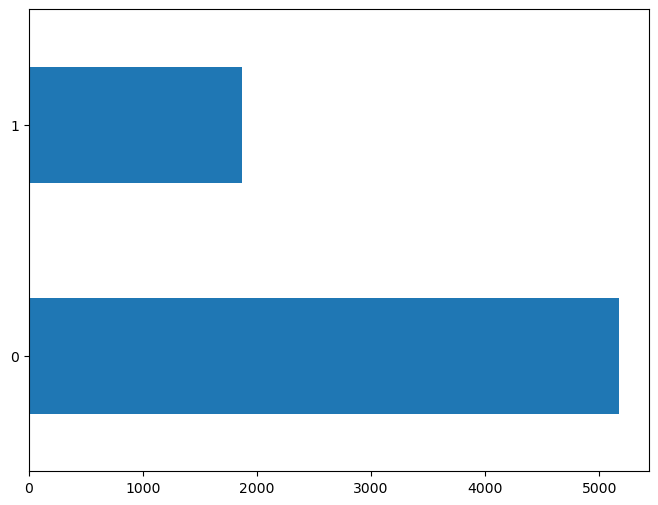

In [155]:
dataset['Churn'].value_counts().plot(kind='barh',figsize=(8,6))

In [156]:
dataset=dataset[dataset.TotalCharges!=' ']

dataset.shape

(7032, 20)

In [157]:
dataset[pd.to_numeric(dataset.TotalCharges,errors='coerce').isnull()].shape[0]

0

In [158]:
dataset.iloc[488]['TotalCharges']

'74.35'

In [159]:
df=dataset[dataset.TotalCharges!=' ']

df.shape

(7032, 20)

In [160]:
df=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod' ])

In [161]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [162]:
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors="coerce")

In [163]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

# Data Scaling

In [164]:
standardscaler=['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
df[standardscaler]=scaler.fit_transform(df[standardscaler])
df[standardscaler]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


In [165]:
X=df.drop(columns=['Churn','gender','Dependents','Partner','InternetService_Fiber optic','Contract_Two year','PaymentMethod_Electronic check'])


In [166]:
y=df['Churn']

In [167]:
X

,SeniorCitizen,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_No,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check
0,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,1,0,1,0,0,0,0
1,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,1,0,0,1,0,0,1
2,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,0,1,0,0,0,1
3,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,1,0,0,1,1,0,0
4,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.323944,1,1,1,0,1,1,1,1,1,0.662189,0.227521,1,0,0,1,0,0,1
7039,0,1.000000,1,1,0,1,1,0,1,1,1,0.845274,0.847461,0,0,0,1,0,1,0
7040,0,0.140845,0,0,1,0,0,0,0,0,1,0.112935,0.037809,1,0,1,0,0,0,0
7041,1,0.042254,1,1,0,0,0,0,0,0,1,0.558706,0.033210,0,0,1,0,0,0,1


# Spliting the data to train and test

In [238]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.28,random_state=44,shuffle=True)

# Logistic Regression

In [241]:
LR = LogisticRegression(penalty='l2' , solver='sag',C=1.0,max_iter=1000,random_state=44)
LR.fit(X_train,y_train)
print("Score of train",LR.score(X_train,y_train))
print("Score of test",LR.score(X_test,y_test))
print("Classes",LR.classes_)
print("Number of iteration",LR.n_iter_)

y_pred_logistic = LR.decision_function(X_test)


Score of train 0.8068338929488446
Score of test 0.8054850177755206
Classes [0 1]
Number of iteration [30]


In [242]:
y_pred = LR.predict(X_test)
y_pred_prob = LR.predict_proba(X_test)
AccScore = accuracy_score(y_test, y_pred, normalize=True)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.8054850177755206


In [243]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[1278  163]
 [ 220  308]]


In [244]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1441
           1       0.65      0.58      0.62       528

    accuracy                           0.81      1969
   macro avg       0.75      0.74      0.74      1969
weighted avg       0.80      0.81      0.80      1969



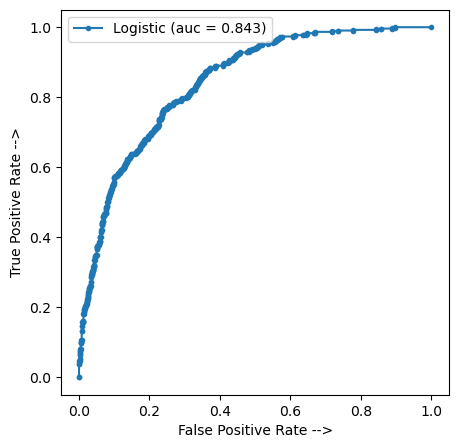

In [245]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()


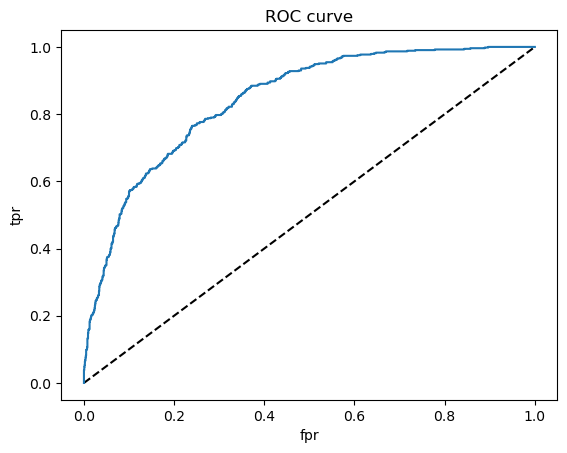

In [246]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_logistic,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# Artificial neural network

In [120]:
from keras import models
from keras import layers

network = models.Sequential([
    Dense(128,activation='relu',input_shape=(20,)),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid'),
])

network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy']) # rmsprop

In [121]:
network.fit(X_train,y_train,batch_size=128,epochs=150,validation_data=(X_train,y_train))

Epoch 1/150
40/40 [==============================] - 1s 9ms/step - loss: 0.4926 - accuracy: 0.7531 - val_loss: 0.4302 - val_accuracy: 0.7952
Epoch 2/150
40/40 [==============================] - 0s 5ms/step - loss: 0.4283 - accuracy: 0.7962 - val_loss: 0.4324 - val_accuracy: 0.7964
Epoch 3/150
40/40 [==============================] - 0s 5ms/step - loss: 0.4201 - accuracy: 0.8011 - val_loss: 0.4206 - val_accuracy: 0.8033
Epoch 4/150
40/40 [==============================] - 0s 5ms/step - loss: 0.4179 - accuracy: 0.8031 - val_loss: 0.4089 - val_accuracy: 0.8094
Epoch 5/150
40/40 [==============================] - 0s 5ms/step - loss: 0.4125 - accuracy: 0.8068 - val_loss: 0.4301 - val_accuracy: 0.7908
Epoch 6/150
40/40 [==============================] - 0s 5ms/step - loss: 0.4109 - accuracy: 0.8080 - val_loss: 0.4054 - val_accuracy: 0.8108
Epoch 7/150
40/40 [==============================] - 0s 5ms/step - loss: 0.4084 - accuracy: 0.8053 - val_loss: 0.4021 - val_accuracy: 0.8112
Epoch 8/150
4

In [122]:
network.evaluate(X_test, y_test)

62/62 [==============================] - 0s 2ms/step - loss: 0.7737 - accuracy: 0.7481


[0.7736850380897522, 0.7480954527854919]

In [123]:
prediction = network.predict(X_test)

62/62 [==============================] - 0s 2ms/step


In [130]:
print(prediction[:10])
print("============")
print(y_test[:10])

[[0.00176969]
 [0.00576919]
 [0.6903009 ]
 [0.9849275 ]
 [0.9976988 ]
 [0.5376617 ]
 [0.02603451]
 [0.9962677 ]
 [0.00309969]
 [0.97810835]]
5449    0
6539    0
2927    0
2477    0
6215    1
1381    0
5367    0
2577    1
454     0
6160    0
Name: Churn, dtype: int64


# SVM

In [247]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [251]:
SVCModel = SVC(kernel= 'rbf',max_iter=10000,C=1,gamma='auto')

In [252]:
SVCModel.fit(X_train, y_train)

SVC(C=1, gamma='auto', max_iter=10000)

In [253]:
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))
print('----------------------------------------------------')

y_pred_svm = SVCModel.decision_function(X_test)


SVCModel Train Score is :  0.8068350668647846
SVCModel Test Score is :  0.8018095648427402
----------------------------------------------------


In [254]:
#Calculating Prediction

y_pred = SVCModel.predict(X_test)
print('Predicted Value for SVCModel is : ' , y_pred[:10])

Predicted Value for SVCModel is :  [0 0 1 1 1 1 0 1 0 0]


In [255]:
#Calculating Confusion Matrix

CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[1524  162]
 [ 298  337]]


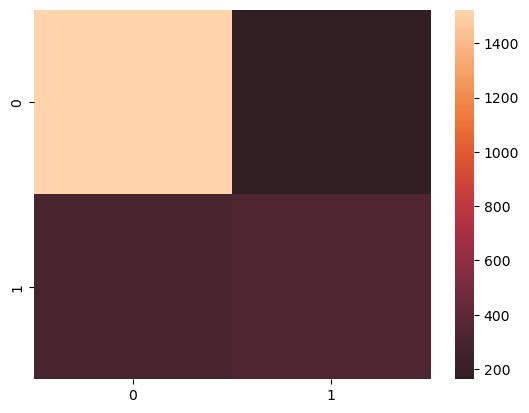

In [228]:
# drawing confusion matrix

sns.heatmap(CM, center = True)
plt.show()

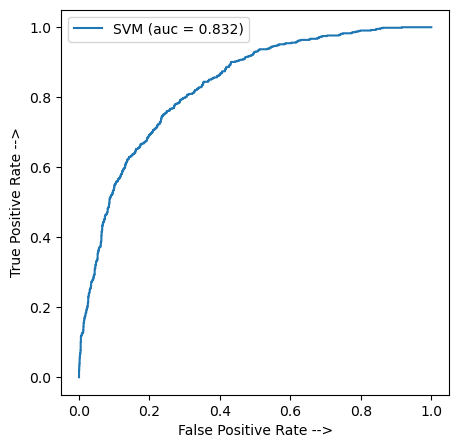

In [256]:
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [257]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1686
           1       0.68      0.53      0.59       635

    accuracy                           0.80      2321
   macro avg       0.76      0.72      0.73      2321
weighted avg       0.79      0.80      0.79      2321

